# Titanic Survival Prediction
Using machine learning to predict survival on the Titanic.

**Kaggle Competition**: [Titanic - Machine Learning from Disaster](https://www.kaggle.com/competitions/titanic)


### import libraries 


In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### loading data

In [111]:
train_df = pd.read_csv(r"D:\titanic project\titanic\train.csv")
test_df = pd.read_csv(r"D:\titanic project\titanic\test.csv")
# copy data to maintain the original data
train=train_df.copy()
test=test_df.copy()
print('train',train.shape)
print('\ntest',test.shape)

train (891, 12)

test (418, 11)


### Data overview

In [112]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [113]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [114]:
print(train['Survived'].value_counts(normalize=True))

Survived
0    0.616162
1    0.383838
Name: proportion, dtype: float64


### finding missing values

In [115]:
train.isnull().sum().sort_values(ascending=False)
# cabin and age has a lot of missing values so we have to impute for age and i might ignore cabin later on
# embarked has only 2 missing so those values can be imputed against mode


Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64

In [116]:
test.isnull().sum().sort_values(ascending=False)
# only age and fare have missing values both can be imputed

Cabin          327
Age             86
Fare             1
Name             0
Pclass           0
PassengerId      0
Sex              0
Parch            0
SibSp            0
Ticket           0
Embarked         0
dtype: int64

### plots to see patterns

<Axes: xlabel='Sex', ylabel='count'>

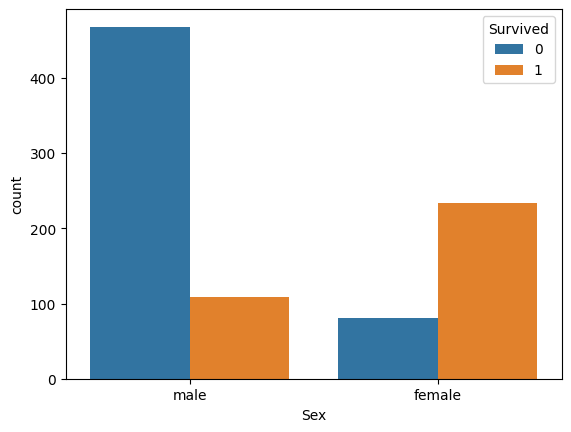

In [117]:
sns.countplot(data=train, x='Sex', hue='Survived')
# female survival rate is better than males on average

<Axes: xlabel='Pclass', ylabel='count'>

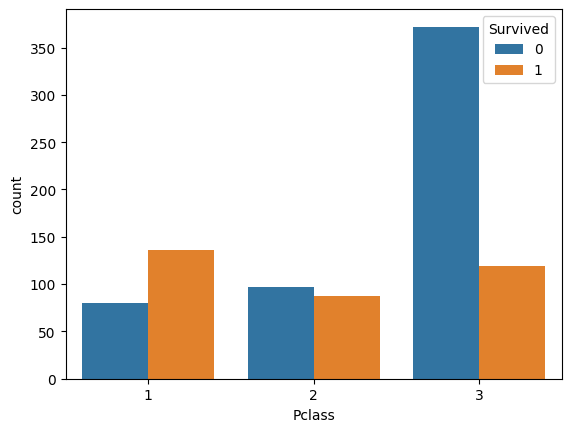

In [118]:
sns.countplot(data=train, x='Pclass', hue='Survived')
# from the plot its clear that there are a lot more casualities in class 3 

<Axes: xlabel='Embarked', ylabel='count'>

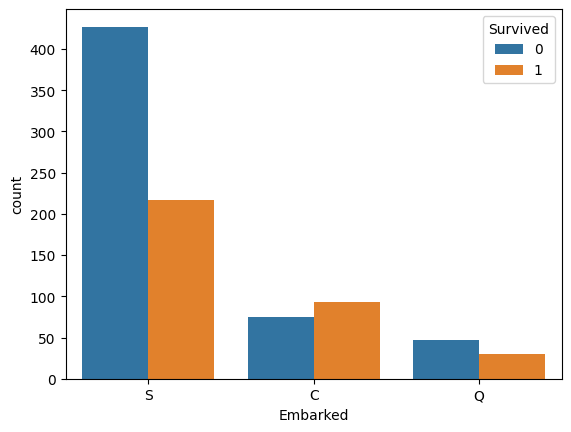

In [119]:
sns.countplot(data=train, x='Embarked', hue='Survived')
# C is Cherbourg
# S is Southampton
# Q is Queenstown


<Axes: xlabel='Age', ylabel='Count'>

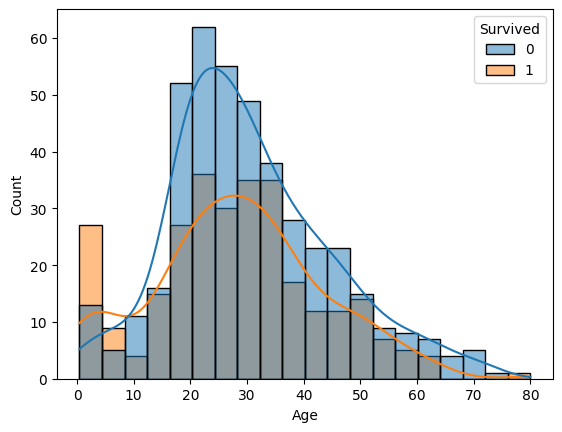

In [120]:
sns.histplot(data=train, x='Age', hue='Survived',kde=True)



<Axes: xlabel='Fare', ylabel='Count'>

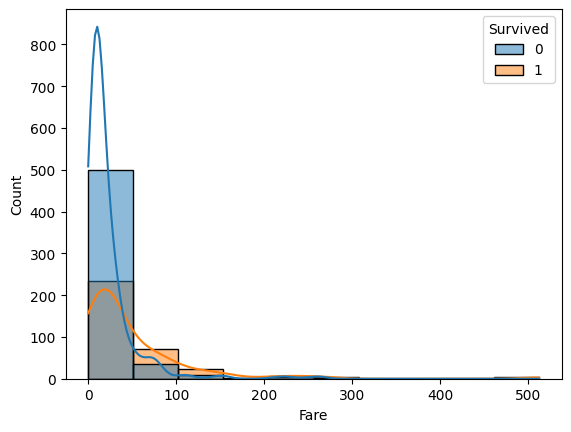

In [121]:
sns.histplot(data=train, x='Fare', hue='Survived', bins=10, kde=True)
# as fare increases the count decreases but survivability increases

<Axes: xlabel='Pclass', ylabel='Age'>

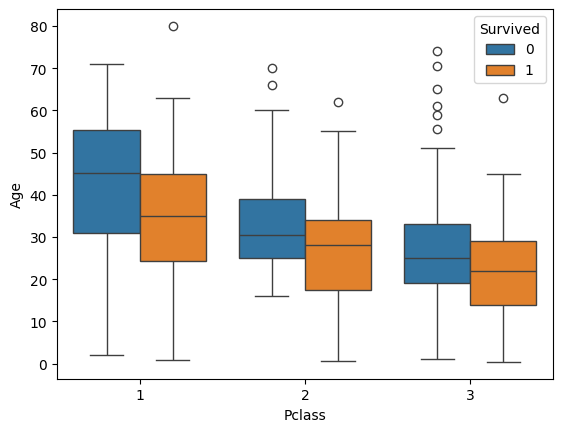

In [122]:
sns.boxplot(x='Pclass', y='Age', hue='Survived', data=train)
# in first class people with ages 35 to 45 survived while in 2nd and 3rd class people focused more on youngsters 

### cleaning and filling values

In [123]:
# drop cabin as there are so many missing values and ticket number is useless when we already have information about passenger class we dont need to extract it from tickets
train.drop(['Cabin', 'Ticket'], axis=1, inplace=True)
test.drop(['Cabin', 'Ticket'], axis=1, inplace=True)


In [124]:
mode_embarked=train['Embarked'].mode()
train['Embarked']=train['Embarked'].fillna(mode_embarked)
# train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True) gave a future error

In [125]:

train['Age'] = train['Age'].fillna(train['Age'].median())
test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())


### getting family size
</p> this will impact overall survival as people with families will have a lesser chance of survival</p>

In [126]:
train['Title']=train['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)# expand=False to get a series rather than a dataframe it gets harder to work with, would have to get the first column manually
test['Title']=test['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False) 

In [127]:
for df in [train, test]:
    df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt','Col','Don','Dr',
                                       'Major','Rev','Sir','Jonkheer','Dona'], 'Rare')
    df['Title'] = df['Title'].replace(['Mlle', 'Ms'], 'Miss')
    df['Title'] = df['Title'].replace('Mme', 'Mrs')
    # print(test['Title'].value_counts())

In [128]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
train['IsAlone'] = (train['FamilySize'] == 1).astype(int)
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1
test['IsAlone'] = (test['FamilySize'] == 1).astype(int)
#print(train[['FamilySize', 'IsAlone']].head())


### encoding to finally begin modelling

In [129]:
# combine to make sure of uniform encoding
combined=pd.concat([train,test],sort=False)
print(train.columns)
combined=pd.get_dummies(combined, columns=['Sex', 'Embarked', 'Title'], drop_first=True)
# split all of it back
train = combined.iloc[:len(train)]
test = combined.iloc[len(train):]
# its showing error because i ran it twice but it got the work done as you can see we already have got separate columns for male q s and others 


Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked', 'Title', 'FamilySize', 'IsAlone'],
      dtype='object')


### training model

In [137]:
X = train.drop(['Survived', 'PassengerId', 'Name'], axis=1)
y = train['Survived']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

In [138]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=200)
model.fit(X_train,y_train)

c:\Users\Dhruv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 200 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=200).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [139]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_valid)
accuracy = accuracy_score(y_valid, y_pred)
print("Validation Accuracy:", accuracy*100)

Validation Accuracy: 81.56424581005587


### plotting results

       Feature  Coefficient
0       Pclass    -0.826033
1          Age    -0.024287
2        SibSp    -0.733507
3        Parch    -0.666389
4         Fare     0.004085
5   FamilySize     0.215144
6      IsAlone    -0.323350
7     Sex_male    -0.145187
8   Embarked_Q    -0.190811
9   Embarked_S    -0.427495
10  Title_Miss    -0.071776
11    Title_Mr    -2.486772
12   Title_Mrs     1.198994
13  Title_Rare    -1.613260


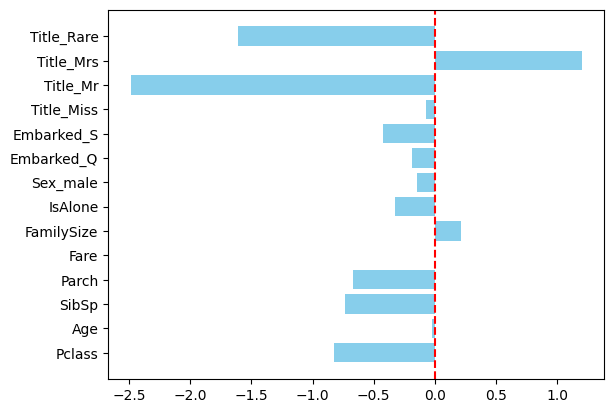

In [140]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]})

print(coefficients[['Feature', 'Coefficient']])
plt.barh(coefficients['Feature'], coefficients['Coefficient'], color='skyblue')
plt.axvline(0, color='red', linestyle='--')

### training a random forest

In [141]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42) # random state is just for consistency and its taken 42  by convention take it any number but keep it same throughout
rf_model.fit(X_train, y_train)
y_pred_rf=rf_model.predict(X_valid)
print(accuracy_score(y_pred_rf,y_valid)*100)

83.24022346368714


In [ ]:
X = train.drop(['Survived', 'PassengerId', 'Name'], axis=1)
y = train['Survived']
X_test = test.drop(['PassengerId', 'Name'], axis=1)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)
#print("Train columns:", train.columns)
#print("Test columns:", test.columns)
test_predictions = rf_model.predict(X_test)


Train columns: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Fare', 'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')
Test columns: Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare',
       'FamilySize', 'IsAlone', 'Sex_male', 'Embarked_Q', 'Embarked_S',
       'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Rare'],
      dtype='object')


### Submission

In [152]:
submission = pd.DataFrame({'PassengerId': test['PassengerId'],'Survived': test_predictions})
submission['Survived'] = submission['Survived'].astype(int)# submitted as float got 0 public score
submission.to_csv('submission_fixed.csv', index=False)